In [1]:
import imageio
import numpy as np
import matplotlib.pylab as plt
import skimage
import pandas as pd


from scipy import ndimage
#from skimage.data import astronaut, coffee, cat, rocket, binary_blobs, brain, clock

In [2]:
def add_salt_pepper(image, prob):
    """
    Add salt and pepper noise to a given image.
    
    Parameters
    ----------
    image : numpy.array
        Image to add noise to.
    prob: float
        Probability of the noise.
    
    References
    ----------
    Taken from:
    https://gist.github.com/lucaswiman/1e877a164a69f78694f845eab45c381a
    """
    output = image.copy()
    
    if len(image.shape) == 2:
        black = 0
        white = 255            
    else:
        colorspace = image.shape[2]
        if colorspace == 3:  # RGB
            black = np.array([0, 0, 0], dtype='uint8')
            white = np.array([255, 255, 255], dtype='uint8')
        else:  # RGBA
            black = np.array([0, 0, 0, 255], dtype='uint8')
            white = np.array([255, 255, 255, 255], dtype='uint8')
    
    probs = np.random.random(image.shape[:2])
    output[probs < (prob / 2)] = black
    output[probs > 1 - (prob / 2)] = white
    
    return output


def add_noise(img, mean=0, std=1, cast=True):
    """Add gaussian noise to a given image to create a noisy
    image.
    
    Parameters
    ----------
    img : numpy.array
        Image to add noise to.
    mean : int or float
        Mean of the gaussian noise.
    std : int or float
        Standard deviation of the gaussian noise.
    
    References
    ----------
    .. [1] StackOverflow - Why does adding Gaussian noise to image give white screen?
       https://stackoverflow.com/questions/50641860/why-does-adding-gaussian-noise-to-image-give-white-screen
    """
    noisy_img = np.clip(img + np.random.normal(mean, std, img.shape), 0, 255)
    
    if cast:
        noisy_img = noisy_img.astype('uint8') # cast to unsigned integer. See references
    
    return noisy_img

In [3]:
def MedianFilter(img,K_size=3):

    # Tamaño imagen 
    h,w,c = img.shape
    
    # Zero padding
    pad = K_size//2
    out = np.zeros((h + 2*pad,w + 2*pad,c),dtype=np.float)
    out[pad:pad+h,pad:pad+w] = img.copy().astype(np.float)
    
    # Proceso de filtrado
    tmp = out.copy()
    for y in range(h):
        for x in range(w):
            for ci in range(c):
                out[pad+y,pad+x,ci] = np.median(tmp[y:y+K_size,x:x+K_size,ci])
    
    out = out[pad:pad+h,pad:pad+w].astype(np.uint8)
    
    return out

In [4]:
def AdaptativeMedianFilter(img,K_size=3):
    
     # Tamaño imagen 
    h,w,c = img.shape
    
    # Zero padding
    pad = K_size//2
    out = np.zeros((h + 2*pad,w + 2*pad,c),dtype=np.float)
    out[pad:pad+h,pad:pad+w] = img.copy().astype(np.float)
    
    # Zona adaptativa
    A_size = 7
    
    # Proceso de filtrado
    tmp = out.copy()
    for y in range(h):
        for x in range(w):
            for ci in range(c):
                max_tresh = np.mean(tmp[y:y+A_size,x:x+A_size,ci]) + np.std(tmp[y:y+A_size,x:x+A_size,ci])
                min_tresh = np.mean(tmp[y:y+A_size,x:x+A_size,ci]) - np.std(tmp[y:y+A_size,x:x+A_size,ci])
                if out[pad+y,pad+x,ci] > max_tresh or out[pad+y,pad+x,ci] < min_tresh:
                    out[pad+y,pad+x,ci] = np.median(tmp[y:y+K_size,x:x+K_size,ci])                 
    
    out = out[pad:pad+h,pad:pad+w].astype(np.uint8)
    
    return out

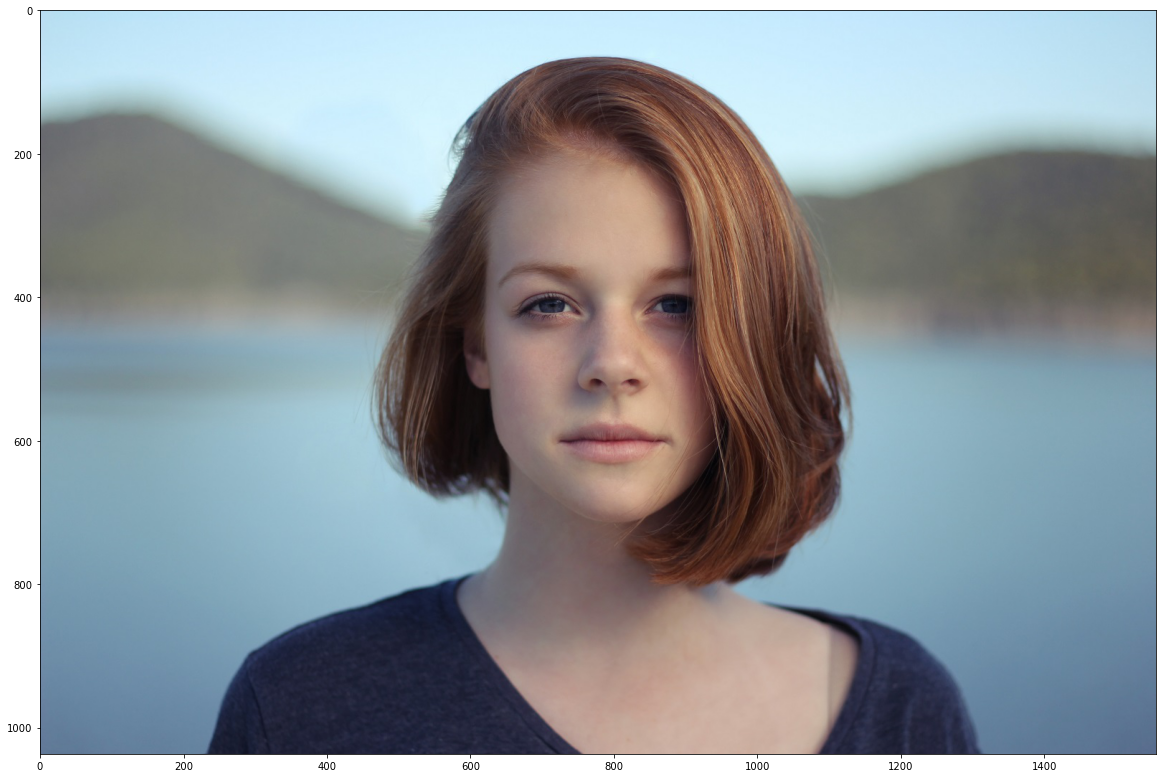

In [5]:
if __name__ == "__main__":
    
    # Read image
    img = imageio.imread("christopher-campbell-unsplash.jpg")
    # Add Noise
    img_noise = add_salt_pepper(image=img, prob=0.1)
    
    # Display image
    plt.figure(figsize=(20,16))
    plt.imshow(img)

 

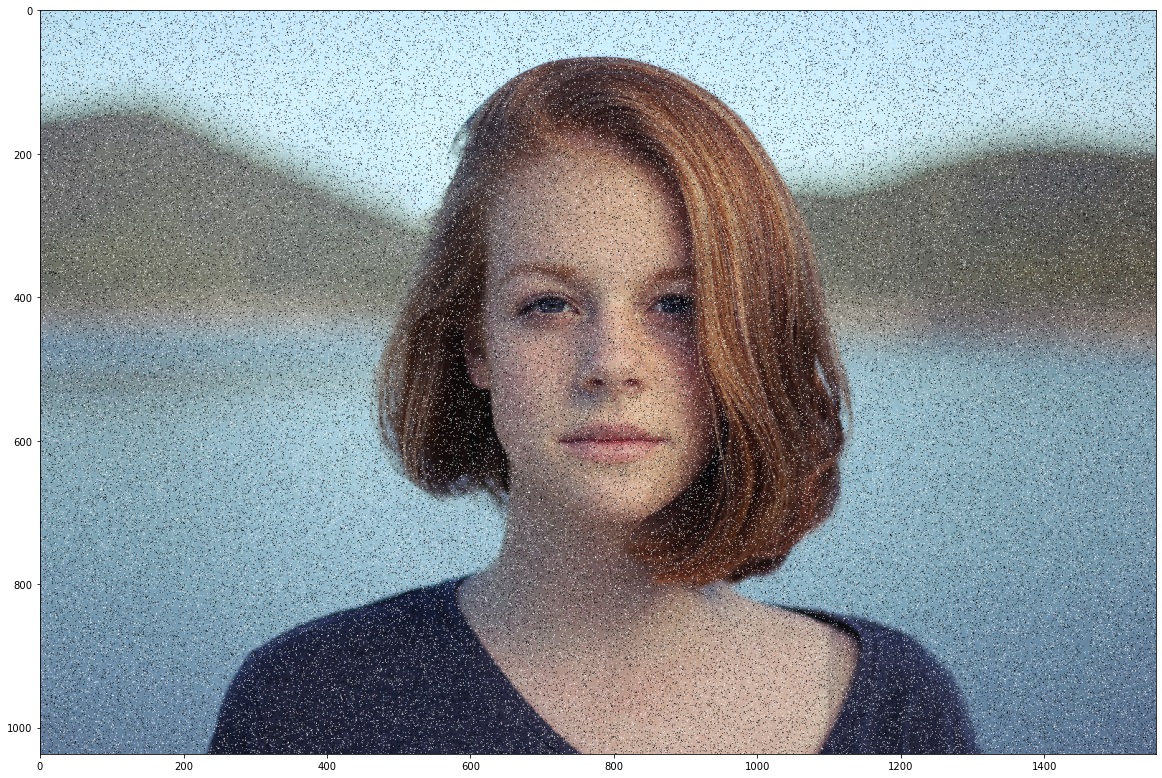

In [6]:
plt.figure(figsize=(20,16))
plt.imshow(img_noise)
plt.show()

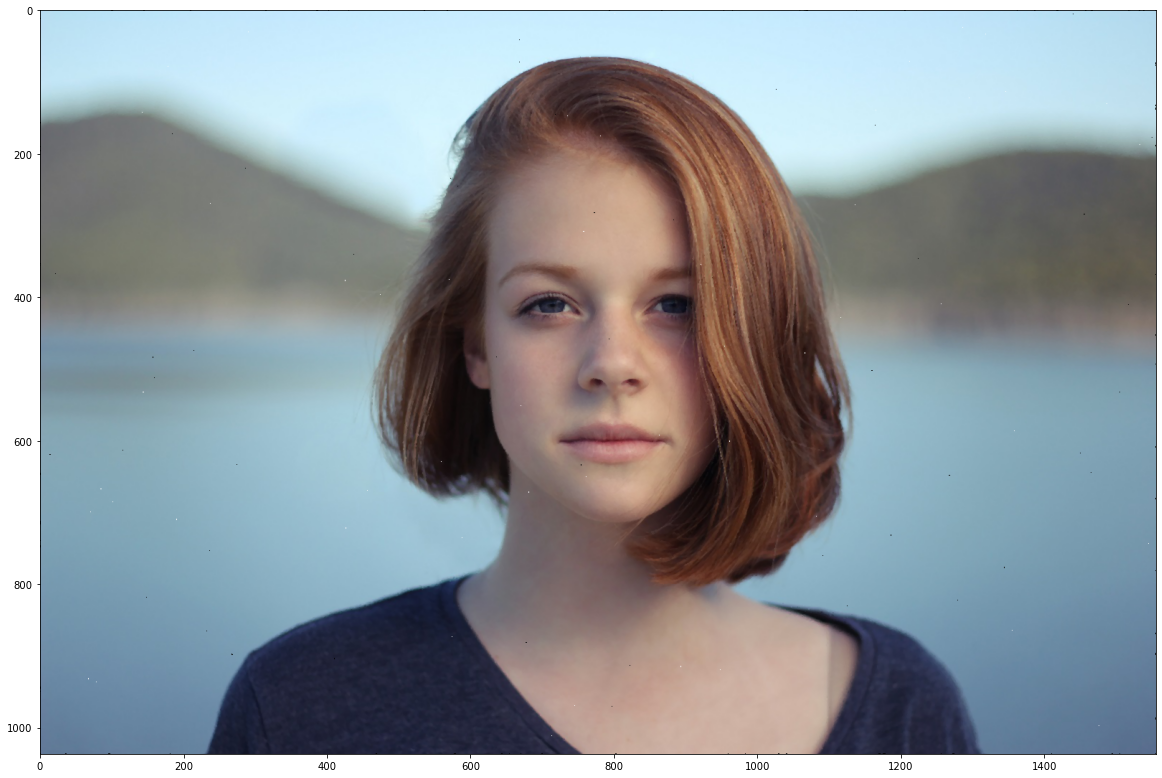

In [7]:
plt.figure(figsize=(20,16))
plt.imshow(MedianFilter(img_noise))
plt.show()

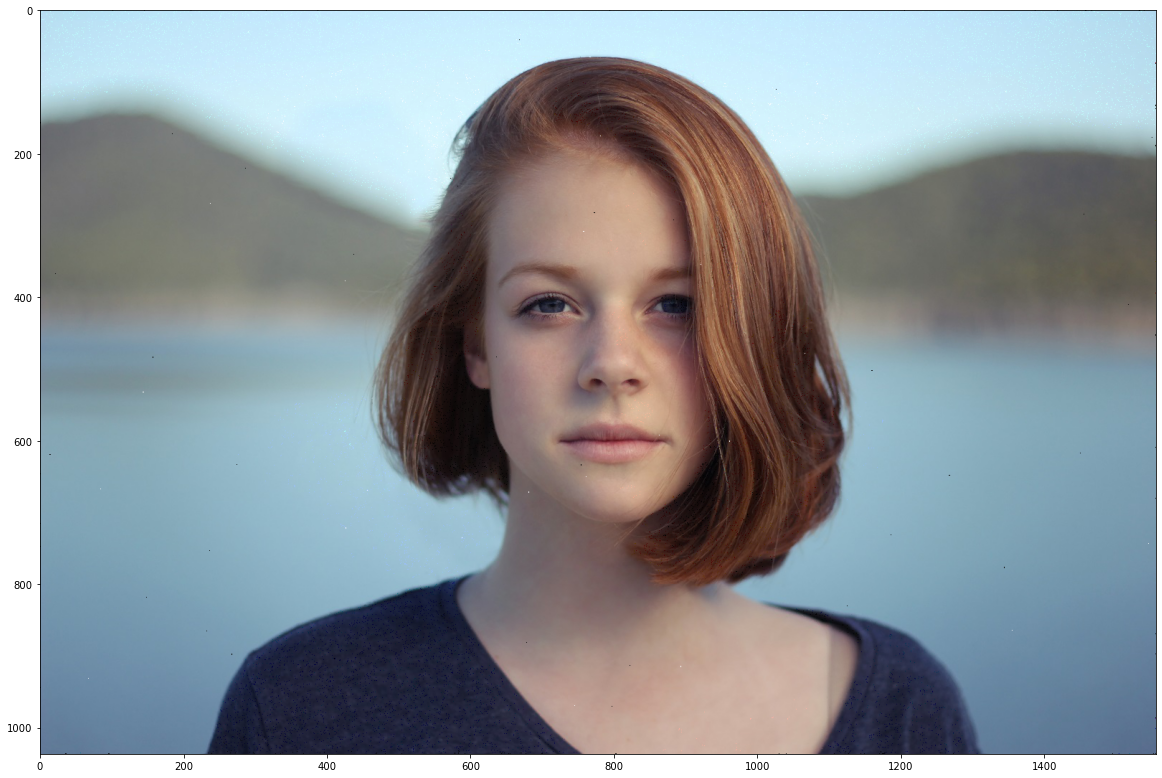

In [8]:
plt.figure(figsize=(20,16))
plt.imshow(AdaptativeMedianFilter(img_noise))
plt.show()

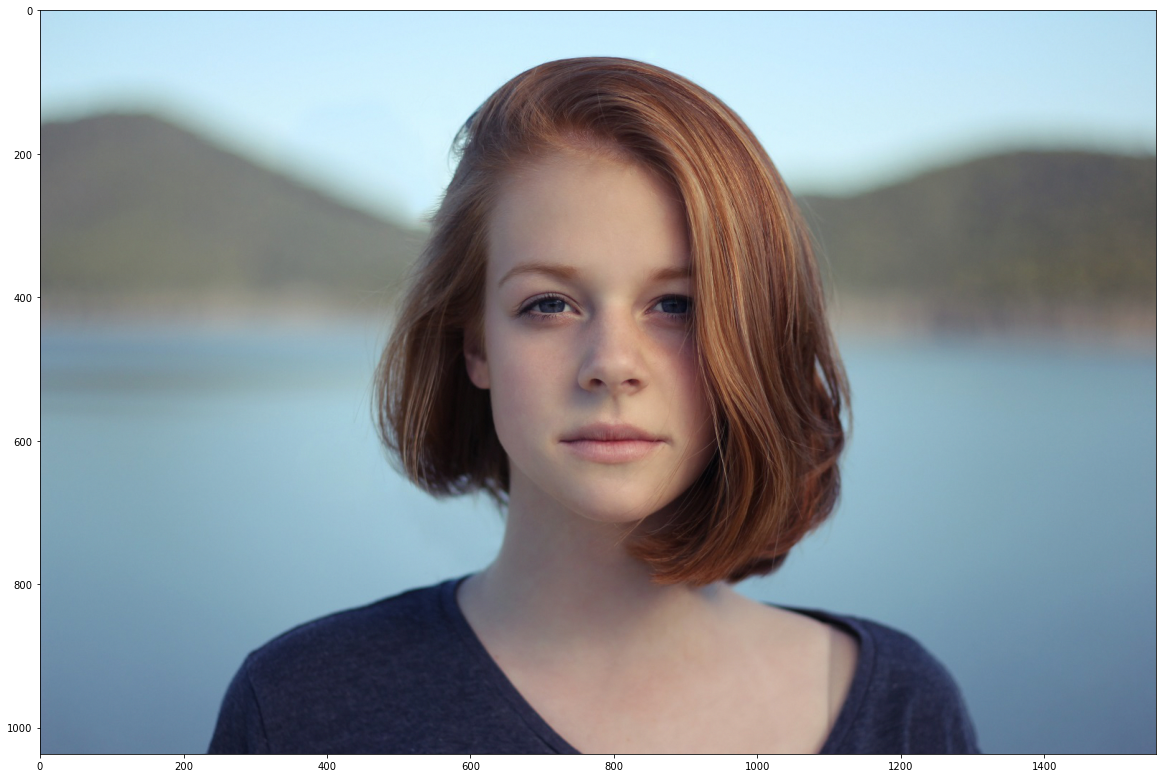

In [9]:
img_noise2 = add_noise(img)
plt.figure(figsize=(20,16))
plt.imshow(img_noise2)
plt.show()

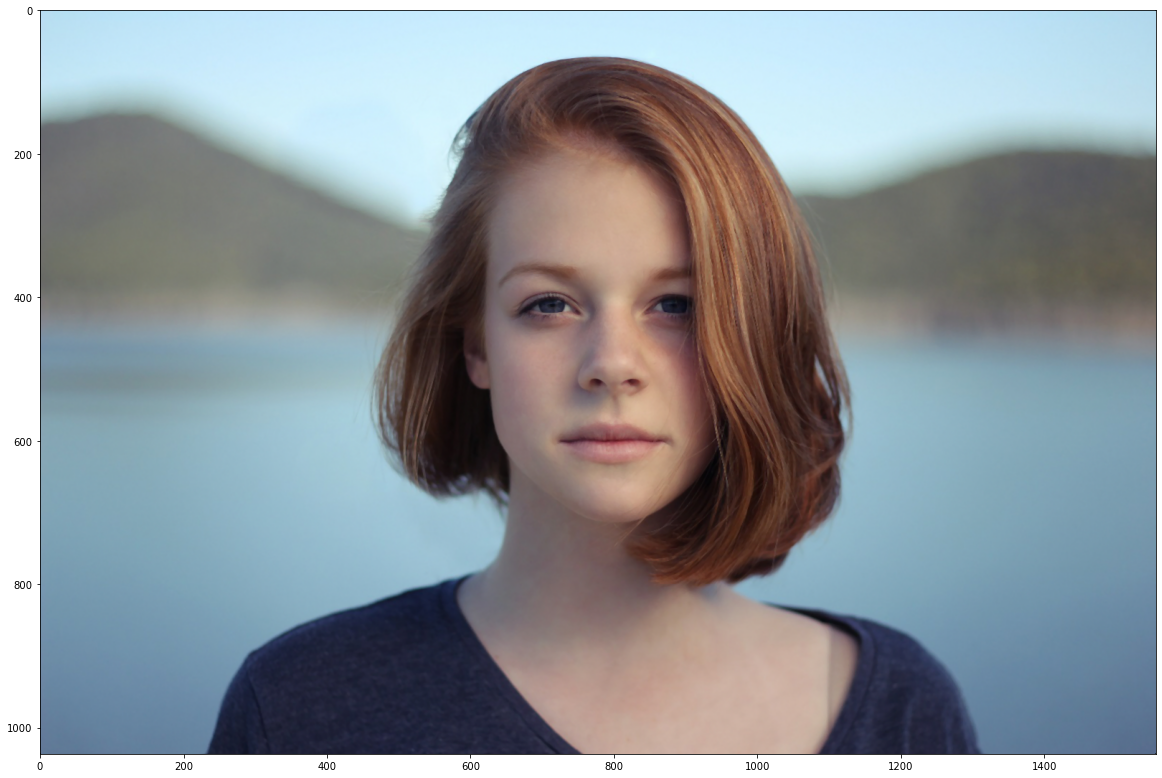

In [10]:
plt.figure(figsize=(20,16))
plt.imshow(MedianFilter(img_noise2))
plt.show()

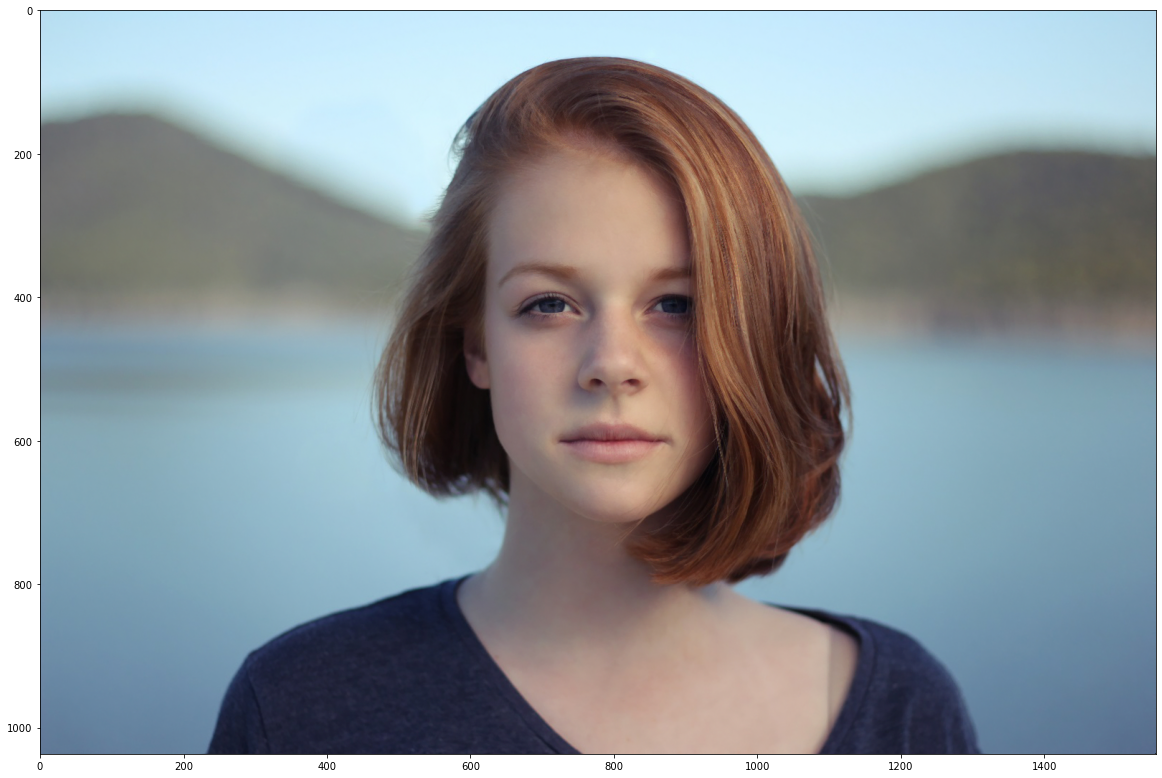

In [11]:
plt.figure(figsize=(20,16))
plt.imshow(AdaptativeMedianFilter(img_noise2))
plt.show()